<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Neural Networks
 
_Author: Adam Jones, PhD (San Francisco)_
 
---

Adapted from numerous sources, including: 
- [*Neural Networks and Deep Learning*](http://neuralnetworksanddeeplearning.com/chap1.html) by *Michael Nielsen*
- [*Not another MNIST tutorial with TensorFlow*](https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow) by *Justin Francis*

This notebook will rely on numpy, matplotlib, and TensorFlow.*

\* For 'simple' installation: `$ pip install --upgrade tensorflow` otherwise, see [here](https://www.tensorflow.org/install/).

<a id="learning-objectives"></a>
## Learning Objectives

- Identify the types of problems a neural network is likely to succeed at.
- Explain the similarities/differences between real and artificial neurons.
- Define the working components of a basic, feed-forward neural network.
- Determine how to apply neural networks to the prediction problem of your choosing.

### Lesson Guide
- [Where Are We Now?](#where-are-we-now)
- [Linear Algebra Review](#linear-algebra-review)
	- [Dot Product](#dot-product)
	- [Matrix Multiplication](#matrix-multiplication)
- [Introduction to Neural Networks](#intro)
	- [What Makes Neural Networks Special?](#nn-special)
	- [The Neuron](#neuron)
	- [An Example](#example)
- [Practical Considerations](#nn-practical)
	- [Network Structure](#structure)
    - [Network Function](#function)
        - [Bias Input](#bias)
        - [Logic Gates](#logic)
- [Neural Network Training](#nn-training)
- [Neural Network Architecture](#nn-architecture)
- [Using Neural Nets To Recognize Handwritten Digits](#nn-digits)
    - [Using TensorFlow](#tensorflow)
        - [Loss Function: Cross-Entropy Loss](#loss-function)
    - [Model Training With TensorFlow](#training-tf)
- [Lesson Review](#topic-review)

In [1]:
# Import toolkits
import matplotlib as plt
import numpy as np
import random as ran
import tensorflow as tf

%matplotlib inline

/home/adam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<a id="where-are-we-now"></a>
## Where Are We Now?

<img src='./assets/ml_algo_map.png' style="float: center; height: 500px">
([Image source](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/))

<a id="linear-algebra-review"></a>
## Quick Linear Algebra Review
---
**Objective:** Compute dot products and matrix multiplications using NumPy

<a id="dot-product"></a>
### Dot Product
The **dot product** of two *n*-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

In [2]:
# Calculate the dot product of v and w using np.dot.
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

np.dot(v,w)
v.dot(w)

8

<a id="matrix-multiplication"></a>
### Matrix Multiplication
**Matrix multiplication**, $\mathbf{A}_{mn}$ x $\mathbf{B}_{ij}$, is valid when the left matrix has the same number of columns as the right matrix has rows ($n = i$). Each entry is the dot product of corresponding row and column vectors.

<img src='./assets/matrix_multiply.gif' style="float: center; height: 150px">
(Image source: [mathisfun.com](mathisfun.com))

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. 
Can you compute the rest of the dot products by hand?

If the product is the $2$ x $2$ matrix $\mathbf{C}_{mj}$, then:

+ Matrix entry $c_{12}$ (its FIRST row and SECOND column) is the dot product of the FIRST row of $\mathbf{A}$ and the SECOND column of $\mathbf{B}$.

+ Matrix entry $c_{21}$ (its SECOND row and FIRST column) is the dot product of the SECOND row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.

Note that if the first matrix is $m$ x $n$ ($m$ rows and $n$ columns) and the second is  $i$ x $j$ (where $n = i$), then the final matrix will be $m$ x $j$. For example, below we have $2$ x $3$ multiplied by $3$ x $2$, which results in a $2$ x $2$ matrix. Can you see why?

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

A.dot(B)

array([[ 58,  64],
       [139, 154]])

<a id='intro'></a>

## Intro To Neural Networks

<a id="nn-special"></a>
### What Makes Neural Networks Special?

Most of us would effortlessly recognize the following sequence of handwritten digits as 504192:

<img src="http://neuralnetworksanddeeplearning.com/images/digits.png" style="float: center; height: 50px">

But the ease of accomplishing this task conceals the highly complicated processes underlying it. Such visual processing relies on intricate, bi-lateral networks of neurons starting in your retina and ending in 'higher order' areas of the brain. Through millions of years of evolution these areas have become specialized to perform specific, behaviorally-relevant tasks, such as discriminating the color of fruit or recognizing different faces.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Lisa_analysis.png" style="float: center; height: 500px">

In general, the further a region is located along the visual pathway, the more complicated the visual behavior it supports. This would suggest that tasks such as identifying hand-written digits or faces requires successive processing by numerous components of the visual pathway. In other words, our brains must first process an object's 'simple' features (color, texture, etc.) before processing its 'complex' ones (shape, identity, etc.). So, just because we are astoundingly good at it, doesn't make identifying things like hand-written numbers an 'easy' task!

>This becomes even more apparent when we consider the complexity of the potential problem space, which, in this case, happens to include any potential combination of pixel-values in a _mxn_ matrix. Put simply, the rules for reading hand-writing are hard to distill.
><img src="https://i.imgur.com/dDYphPB.png" style="float: center; height: 300px">
>But, complex, non-linear problems such as character recognition are exactly where the flexibility of **neural networks** start to become the most useful.

<a id="neuron"></a>
### The Neuron

Neural networks were initially proposed as a way of understanding how the brain works. In the case of recognizing handwriting or the identity of faces, artificial neurons (such as the perceptron below) each make a yes or no (or 'binary') decision, before passing their output to the next perceptron in the network for the next decision. 

<img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png" style="float: center; height: 300px">

In the example shown above, the perceptron has three binary inputs, _x<sub>1</sub>_, _x<sub>2</sub>_, and _x<sub>3</sub>_, and produces a single binary output. When the perceptron was proposed in the 1950's by Frank Rosenblatt, he included a relatively simple rule for computing the output. Weights (_w<sub>1</sub>_ to _w<sub>n</sub>_) are assigned to each input to represent their relative importance. 

<img src="http://blogs.bmc.com/wp-content/uploads/2017/11/output.png" style="float: center; height: 200px">

Thus, the neuron's output is determined by the weighted sum:

\begin{equation*}
    \sum_{j=1}^n w_j x_j \leq threshold
\end{equation*}

So, as is often the case, we set a __threshold__ and declare that as the cut-off point for whether to _'fire'_ (output a one), or not (output a zero).

\begin{equation}
  output=\left\{
  \begin{array}{@{}ll@{}}
    0 & \text{if}\ \sum_{j=1}^n w_j x_j \leq threshold \\
    1 & \text{if} \sum_{j=1}^n w_j x_j > threshold \\
  \end{array}\right.
\end{equation}

<a id="example"></a>
### An example

Although these models were structured to behave like neurons, their behavior can also be illustrated by an analogy to human decision making: 
>Imagine a scenario where you are forced to decide to either take ski trip or not (to stay home, instead).

>You could imagine the decision coming down to the influence of three different factors:
>1. Is the weather forecast good (what kind of conditions can you expect on the slopes)?
>2. Is it a weekend (traffic, crowds, etc)?
>3. Can I spare the money (for lift tickets cost, etc)?
>
>On any given day we could represent the answer to each of these questions by a vector of 3 binary values (each a 0 or a 1). For example, if it was forecast to be good weather on a Tuesday, and I had just gotten a bonus at work (extra money to spare), I could represent that as:
>
>\begin{equation*}
\vec{x}   = [1,0,1]
\end{equation*}
>
>But each of these factors could (and most certainly, would) have different influences on the final decision, relative to each other. So we could represent this with a set of numbers or _'weights'_, (_w<sub>1</sub>_ to _w<sub>n</sub>_). If, for example, the weather was really important to me, and the day-of-the-week less so, but the money was relatively un-important, I might assign:
>
>\begin{equation*}
\vec{w}   = [9,5,1]
\end{equation*}

>I'm now in a position to multiply each element in $\vec{x}$ by each element in $\vec{w}$ to get a single output telling me whether I should take the ski trip or not. All that's left is to decide _before-hand_ on some cut-off, above which I will take the trip and below which I will not. Let's use 12 as our cut-off for this example.
>
>$${\large
\begin{equation*} 
    \ \vec{w} \cdotp \vec{x} = \left[\begin{array}{c} 9 \\ 5 \\ 1 \end{array} \right]
    \cdotp \left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array} \right] = 10 \\
     \ 10 \leq threshold \\
  output=0
\end{equation*}
}$$

>
>One of the advantages of this approach is that if I don't like the output produced by my model (e.g. money becomes more important to me), I can just go back and adjust the weights for that particular variable and my predictions will change accordingly.
>
>$${\large
\begin{equation*}
    \ \vec{w} \cdotp \vec{x} = \left[\begin{array}{c} 9 \\ 5 \\ 7 \end{array} \right]
    \cdotp \left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array} \right] = 16 \\
     \ 16 > threshold \\
     output=1
\end{equation*}
}$$
>
>So, by manipulating the weights of our models, we end up with different models and ultimately, different decisions.  Imagine if, in our example, we decide to be more careful with money. In order to represent this, we can increase the relative importance of money in our model. In this case, we just got a bonus at work, so money is not a problem at the moment. The output has consequently increased and crossed our threshold. We get to go skiing!!!
>- In the future, however, if money gets tight, this model is less likely to let us go skiing.

><img src="./assets/ski_guy.gif" style="float: center; height: 250px">

<a id='nn-practical'></a>
## Practical Considerations

<a id="structure"></a>
### Network Structure
Although the model we just described was useful for illustrating the basic components of the 'decision-making' process in a neural network, it's ultimately not much of an improvement (if any) on the linear models we've seen so far. This is because, as you might have guessed, typical neural networks are of much greater complexity. These networks typically consist of one or more columns of stacked perceptrons (or *'layers'*). 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/220px-Neural_network_example.svg.png" style="float: center">

Each perceptron feeds into every perceptron in the layer following its own, and so on until the final output. With all of these decisions going on, it's becomes easier to see now why neural networks are capable of such subtle (and sometimes nuanced) decision-making.

Let's explore some of the practical consequences of the arrangement above-
The perceptrons in the first layer will learn to make decisions based purely on the 'raw' input to the model. As the output of each is 'fed-forward', the second layer will receive input which has already been transformed somewhat by the decisions made in the first layer. As a result, each layer could be described as learning to use more abstract features than the layer before it.

> It's worth pointing out at this point, that this is another aspect of neural networks that bears a striking resemblance to the way the brain works. [Lots more to say here] 

<a id="function"></a>
### Network Function

We should also clarify how we decide what threshold is a good one to use. But before we can understand that, we need to discuss the idea of bias, and the role it plays in the perceptron's output.

<a id="bias"></a>
#### Bias Input

The purpose of the bias input is to influence the likelihood of triggering a given perceptron to 'fire', or more specifically, output a one instead of a zero. The greater the bias, the less input is required to trigger a perceptron (and vice-versa).

But, it also leads to some convenient notational simplifications regarding the calculation of our output (see below). Because of these advantages, we'll refer to the 'bias', instead of the 'threshold', from now on.

\begin{equation}
  b=-threshold\\
  output=\left\{
  \begin{array}{@{}ll@{}}
    0 & \text{if}\ w \cdotp x +b \leq 0 \\
    1 & \text{if}\ w \cdotp x +b > 0 \\
  \end{array}\right.\\
\end{equation}

<a id="logic"></a>
#### Example: Logic Gates
We've seen how a perceptron can be employed to integrate the influence of many inputs in order to arrive at some decision, but we haven't considered how these same units can perform more 'logical', gate-type functions, as well. As we'll see in the example below, by incorporating a bias into the output of each perceptron, we can evaluate computational functions such as AND, OR, and NAND.

***Quick* review of logic gates**
<img src="./assets/logic_gates.png" style="float: center; height: 450px">

[Image source](http://www.schoolphysics.co.uk/age16-19/Electronics/Logic%20gates/text/Logic_gates/index.html)

>**Example:**
> Imagine we have a simple perceptron with just two inputs, both with the same weight (-2), with a bias input of 3. Our perceptron would look something like the example below:
<img src="http://neuralnetworksanddeeplearning.com/images/tikz2.png" style="float: center; height: 150px">
>
>We can further imagine that we provide the model with `[0,0]`, and we see:
>
>\begin{equation}
    (-2)*0+(-2)*0+3=3\\
    \text{so} \ output=1
\end{equation}
>
>The same process would reveal the following results:
>
><table style="border: none">
><tr style="border: none">
    <td style=""><b>$x_1$</b></td>
    <td style=""><b>$x_2$</b></td>
    <td style=""><b>$output$</b></td>
</tr>
><tr>
    <td style="text-align: center">0</td>
    <td style="text-align: center">0</td>
    <td style="text-align: center">1</td>
</tr>
><tr>
    <td style="text-align: center">1</td>
    <td style="text-align: center">0</td>
    <td style="text-align: center">1</td>
</tr>
><tr>
    <td style="text-align: center">0</td>
    <td style="text-align: center">1</td>
    <td style="text-align: center">1</td>
</tr>
><tr>
    <td style="text-align: center">1</td>
    <td style="text-align: center">1</td>
    <td style="text-align: center">0</td>
</tr>
</table>
>
>It's a **NAND gate**!

The above is a *very* simple example of how single perceptrons are capable of implementing logical computations. But, in practice, neural networks can collectively compute *any* logical function possible! 

As impressive as this may sound, it actually overlooks the real value neural networks have in helping to solve complex problems. Like your brain, the perceptron is capable of adjusting its weights and biases following experience with external stimuli, in order to improve performance (and thus maximize reward) on a defined task. We shift our focus to this process in the next section.

<a id='nn-training'></a>
## Neural Network Training

To make the daunting task of training our (potentially-complicated) network of perceptrons more tractable, we'd really like to be able to make small changes to our weights (and biases) and expect small changes in behavior as a result. That way we could carefully experiment with different values and eventually improve the quality of our predictions. Something like this would be ideal:

<img src="http://neuralnetworksanddeeplearning.com/images/tikz8.png" style="float: center; height: 250px">

But, the current model we have introduced does _not_ exhibit this behavior. If we implemented the current model, and manipulated our weights in order to improve our predictions, we could expect to see changes so severe that it was impossible to make any progress toward our goal of better prediction accuracy.
So, what do we do?

It is at this point that we say goodbye to the perceptron, and meet a new type of artificial neuron: the _sigmoid neuron_. Their behavior is largely similar, however, the sigmoid neurons respond less to changes in their weights and biases. 
This is a result of differences in their output; whereas, the perceptron could only produce binary values (0 or 1), the sigmoid neuron produces continuous values between 0 and 1. This is because the perceptron's rule was:

\begin{equation}
    \ \vec{w} \cdotp \vec{x} +b \
\end{equation}

Whereas, the sigmoid neuron's rule is:

$$\sigma \ (\vec{w} \cdotp \vec{x} +b) $$

$\sigma$, in this case, refers to the sigmoid function, which is defined below. In case this looks familiar, it's because we've also seen it called the _logistic function_, where it serves a similar purpose by scaling the output of the linear regression model to values between 0 and 1.

$$ \sigma(z)=\frac{\mathrm{1} }{\mathrm{1} + e^{-z} }  $$ 

Although you may be more familiar with the expression above, we can also define the output of a sigmoid neuron with inputs $x_1,...x_n$, weights $w_1,...w_n$, and bias $b$ as:

$$ \frac{\mathrm{1} }{\mathrm{1} + exp(-\sum_{j} w_j x_j -b) }  $$

>To understand these formulas, just appreciate that when the output of the linear model ($w \cdotp x +b$) is very large (positive *or* negative), then $e^{-z}$ is close to zero, making $\sigma(z)$ similar to $z$. In other words, the output of both models is very similar for large values.
It's really only when the input is more moderate that these models truly differentiate themselves. 

In [4]:
# create fake data
z_vals = np.array(range(-99,99))

# create output for each model type
step_output = 1.0*(z_vals>0)
sig_output = 1/(1+np.exp(-z_vals))

We can visualize the differences between these models more easily by comparing their respective shapes when plotted. 
- First, we can consider the output of the perceptron to correspond to the step function (below, blue line). As we can see, this function returns a binary output depending on whether $z$ (the value of $w \cdotp x +b$) is positive or negative.
- The sigmoid neuron (orange line), we can see, is a smoothed version of the step function- not too different from the step function, at first glance. But, it's the increased smoothness that decreases the slope around zero a tiny bit so that now, small changes ($\Delta w_j$) in the weights and ($\Delta b$) in the bias result in similarly small changes ($\Delta output$) in the output of the sigmoid neuron. It's actually possible to show that ($\Delta output$) is a linear function of ($\Delta w_j$) and ($\Delta b$). This linearity means we can now begin making progressively better and better predictions as a consequence of exposure to training samples.

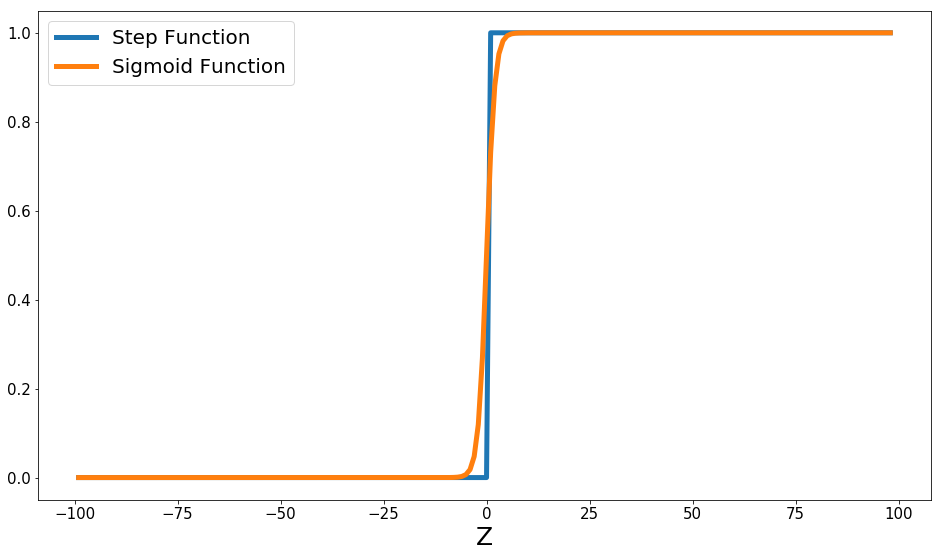

In [5]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.pyplot.subplots()
plt.pyplot.plot(z_vals,step_output, lw=5)
plt.pyplot.plot(z_vals,sig_output, lw=5)
ax.set_xlabel('Z', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['Step Function', 'Sigmoid Function'], fontsize=20);

It's worth considering, before moving on, the unique interpretations of step vs. sigmoid function output (with regard to making a prediction). While the former case makes interpretation straight-forward by providing a binary output, the latter can be more problematic, as it can be any real number between 0 and 1. But again, the most common solution is simply assigning a 'reasonable' threshold to use. In cases like this, .5 is usually a safe place to start.

<a id='nn-architecture'></a>
## Neural Network Architecture

Before we get started on our example, let's define some terminology to help us understand the important components of a neural network.

As we saw previously, the network will be designed in order to accept an input of a specific shape. After processing of these inputs has been completed by this network, it will produce an output that we will use to make a prediction. Not surprisingly, these layers are referred to as the **input** and **output layers**, respectively. Depending on the particular network, there may be one (or many more, in some cases) additional layers between the input and output layers. Because we are less likely to interact with these intermediate layers, they are referred to as **hidden layers**.

<img src="http://neuralnetworksanddeeplearning.com/images/tikz11.png" style="float: center; height: 250px">

As an example, we could describe the network above as a four-layer network containing two hidden layers.

Although, the specific arrangement of our layers is often straightforward, it's worth considering the different possibilities for each.

---
The only constraint on the **input layer** is that it must correspond to the shape of the intended input. 
>For example: if I want to predict purchasing behavior based on 20 different variables (age, weight, gender, etc.), then my input layer needs to contain 20 neurons. If I want to make predictions using a 120x150 image, then my input layer needs to contain 18,000 neurons ($120\times150=18,000$).

---
The only constraint on the **output layer** is that it must correspond to the shape of the intended prediction. 
>For example: if I want to predict a _binary_ outcome (`True` or `False`), I can represent that with a single neuron. As we'll see later, if we want to predict a _multi-class_ outcome (integers: `0:9`), we need n-1 neurons to represent it ($n-1=9$, in this case).

Although the design of the input and output layers are relatively simple, choosing the arrangement of the intermediate or "hidden" layers, can be much less so. In general, this is another instance in which a trade-off exists, which is our responsibility to optimize. In this case, the trade-off is between the complexity of the network, and the time required to train it. Hopefully this idea is already somewhat familiar, though, as it applies to all of the statistical models we've encountered in this course.

The materials in this course (such as the examples in this notebook) will focus exclusively on *feed-forward* networks. These are networks in which there are no 'loops' capable of outputting signals in the backwards direction. But, now is a good time to introduce you an alternative model that you may like to use in the future. These models contain 'feed-back' loops and are referred to as [recurrent neural networks](http://en.wikipedia.org/wiki/Recurrent_neural_network).

Because neurons in these loops undergo sustained bouts of activity, rather than isolated events, recurrent feed-back can result in cascades of neurons firing, which happens to be much closer to the behavior of actual neurons in your brain. Although they can be more difficult to train, they are sometimes capable of solving harder problems than feed-forward networks, particularly those involving NLP.

<a id='nn-digits'></a>

## Using Neural Nets To Recognize Handwritten Digits

The idea is to first train the model on a large number of samples of handwritten digits (see examples below), for which we know the true label (e.g. '7' or '3'). These are known as _training examples_ and _training labels_, respectively.

<img src="http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png" style="float: center; height: 450px">

In [33]:
# Load data
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR) # Change verbosity of tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./datasets/MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./datasets/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./datasets/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


Next, let's define a couple functions that will assign the amount of training/test data we'll load from the data set.

In [7]:
def train_size(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def test_size(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

Let's also define some simple functions for resizing and displaying the data.

In [8]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.pyplot.title('Example: %d  Label: %d' % (num, label))
    plt.pyplot.imshow(image, cmap=plt.pyplot.get_cmap('gray_r'))
    plt.pyplot.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.pyplot.imshow(images, cmap=plt.pyplot.get_cmap('gray_r'))
    plt.pyplot.show()

That's it! Now, we're ready to build and train our neural network model. To do that, we just need to define our training and testing sets. Let's start by looking at all of the data (we'll change that later to speed things up). 

In [9]:
x_train, y_train = train_size(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



So, what does the output above mean?
It's telling us that our data set contains 55,000 images (of handwritten digits from zero to nine). Each image is a 28x28 pixel image, which has been *'flattened'* to be fed into our neural network.

We can see that `x_train` contains 55,000 examples (rows) with 784 pixels each (columns). 

`y_train` contains the corresponding labels associated with each of the `x_train` examples. But, instead of each label being stored as the number representing the digit, it's been expanded into dummy-variable form- each label is now a 1x10 binary array with the position corresponding to the digit it represents (from zero to nine). 
>As an example, instead of `3`, the label is `[0,0,0,1,0,0,0,0,0,0]`.

We should always get in the habit of routinely inspecting samples of the data (and the output of the model), just make sure everything is as it should be. So, let's pull out a random image using our custom function that accepts flattened data, reshapes into an image, and displays it along with its label.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


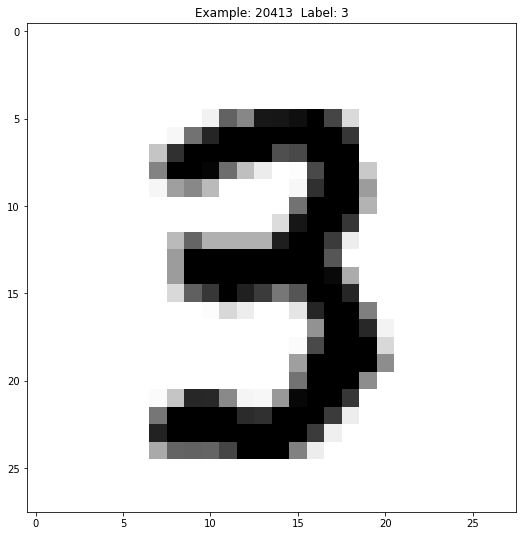

In [10]:
display_digit(ran.randint(0, x_train.shape[0]))

# Try this:
# [display_digit(ran.randint(0, x_train.shape[0])) for i in range(3)]

Just for kicks, let's take a look at what the classifier sees and look at some of the training samples in their flattened form. 

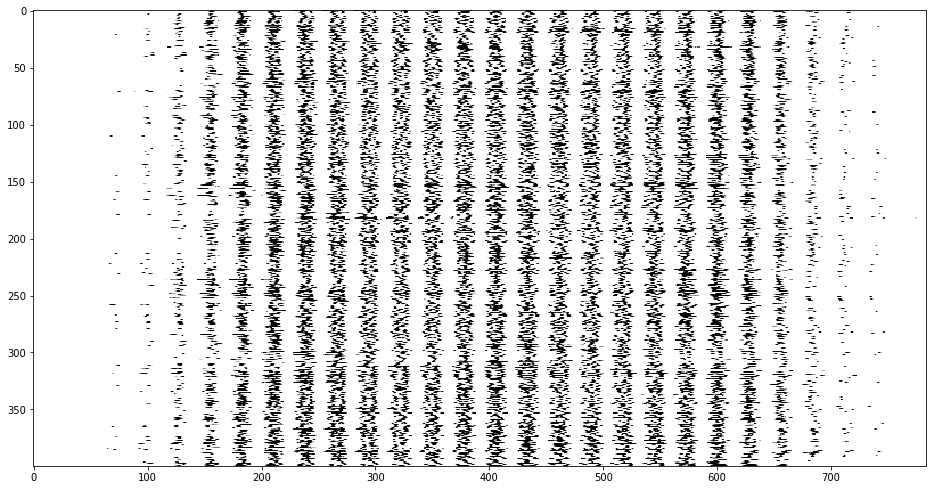

In [11]:
display_mult_flat(0,400)

<a id='tensorflow'></a>
### Using TensorFlow

Up until now, we haven't actually been using TensorFlow at all. Now that our data is ready to go, let's fire that up and define our '*session*'.

In [12]:
sess = tf.Session()

Now we need to define a '*placeholder*', which is just what it sounds like- a variable that holds our data. In order to feed our data in, however, it has to conform to the specific shape of the placeholder.
> The TensorFlow website explains: “A placeholder exists solely to serve as the target of feeds. It is not initialized and contains no data.”

In [13]:
# Define placeholder to feed our x_train data into
x = tf.placeholder(tf.float32, shape=[None, 784])

Here, we've defined a placeholder `x` to receive the `x_train` data, and because we assigned `None` to the row input, it can be fed any multitude of 784-element vectors.

Using the same logic to define another placeholder `y_` to receive `y_train` as input. Since each label is a 1x10 array, we set it up to accept any multitude of 10-element vectors.

In [14]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

The next step is to assign our *weights* `w` and *bias* `b`. As with the linear models we've seen previously, these are the only values we need to calculate a prediction once our neural network classifier has been trained.

But, the model is 'naive' to start out, so we intialize these values to zero. Notice that we create our weights to be the same shape as our input and we create our biases to be the same shape as the output.

In [15]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Finally, we need to define `y`, our '*classifier function*'. For this application, we'll use the 'softmax' function (for reasons we'll explore later), wrapped around a multinomial logistic regression. This means that we'll make each prediction by taking the product of each pixel and its corresponding weight, offset by the bias input.

In [16]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

Focusing on the input to `softmax` above: `matmul` is multiplying the matrices `x`(mx784) and `W`(784xn) to get a `m`(number of training examples fed) x `n`(number of classes) matrix.

<img src='./assets/matrix_multiply.gif' style="float: center; height: 150px">

In [17]:
# Check and see
print(y) 

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


Finally- we can start feeding our classifier some examples and seeing what it predicts. Let's set-up our session by initializing all of the necessary variables.

In [18]:
x_train, y_train = train_size(3)
sess.run(tf.global_variables_initializer()) 
print(sess.run(y, feed_dict={x: x_train}))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (3, 784)
y_train Examples Loaded = (3, 10)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


These are the predictions of the model for the three training samples we provided it. But, since it hasn't been trained yet (and so hasn't 'learned' anything), it just guesses at each class with equal probability. 

In [19]:
sess.run(tf.nn.softmax(tf.zeros([4])))

array([0.25, 0.25, 0.25, 0.25], dtype=float32)

In [20]:
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

<a id="loss-function"></a>
#### Loss Function: Cross-Entropy Loss

In order to train our model, we need to define a loss function. As you may recall, it gives us a measure of how well (or badly) our model is performing, by comparing the observed and predicted values for each sample. The overall goal is to *minimize* this loss by selecting the right values for our weights and biases.

For this application, we will use the 'cross entropy' loss function.

In [21]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

The cross entropy loss function is the product of the log of our prediction(s) `y` (values between 0 and 1) and the observed value `y_`. The details are outside of the scope of today's class, but the important thing to know is that it penalizes the classifier (indicates loss) with a large number if the prediction is incorrect and with a small number if it's correct.
>Take a look at the example below to see what softmax is doing.
>- In the first imaginary example, the model is very confident that the digit it's seeing is a 3.  

In [22]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025] # Example prediction
k = [0,0,0,1,0,0,0,0,0,0] # True labels
print(np.log(j))
print(-np.multiply(np.log(j),k))

[-3.5065579  -3.5065579  -4.60517019 -0.10536052 -4.60517019 -4.60517019
 -5.99146455 -5.99146455 -5.99146455 -5.99146455]
[0.         0.         0.         0.10536052 0.         0.
 0.         0.         0.         0.        ]


>This returns $0.1053$, which would be considered an accurate prediction.
>
>Next, let's consider what happens when we make the same prediction for what is actually a 2.

In [23]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]
#j = [1/len(k)]*len(k);print(j)
k = [0,0,1,0,0,0,0,0,0,0]
print(np.log(j))
print(-np.multiply(np.log(j),k))

[-3.5065579  -3.5065579  -4.60517019 -0.10536052 -4.60517019 -4.60517019
 -5.99146455 -5.99146455 -5.99146455 -5.99146455]
[0.         0.         4.60517019 0.         0.         0.
 0.         0.         0.         0.        ]


>Now we get $4.6051$, which indicates an incorrect (and heavily penalized) prediction. The high penalty is a result of the classifier's relative confidence on the incorrect decision.
>- Test this by changing which `j` is used in the cell above.

<a id='training-tf'></a>
### Model Training With TensorFlow

Now that we have defined our loss function, we can begin training our neural network model. In order to do so, we just need to improve our `w` and `b` values such that it improves (or reduces) the output of our loss function.

Below are the parameters that we can tune to begin customizing our training process. Try the defaults to begin with, but then feel free to experiment with them! See what happens when you assign a value that's too high or too low*. There should be no need to re-run the code above, just change the values below and run the remaining cells to observe the output.

\*Just be warned-- setting `train_size` to a large value will result in longer training time. 

In [24]:
x_train, y_train = train_size(5500)
x_test, y_test = test_size(10000)
learning_rate = 0.1
train_steps = 2500

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


Let's initialize our variables for use by TensorFlow.

In [25]:
init = tf.global_variables_initializer()
sess.run(init)

Next, we train our classifier using '*gradient descent*'. In order to do so we first define our method to use the assigned `learning_rate` to minimize our `cross_entropy` loss function.

In [26]:
training = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy) # define our method
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

To implement this, we set up a loop that runs from `0:trainsteps+1`; running `training` and feeding in values from `x_train` and `y_train`.
We calculate the accuracy using un-seen data (*important!*).

In [27]:
for i in range(train_steps+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + 
              str(i) + 
              '  Accuracy =  ' + 
              str(sess.run(accuracy,feed_dict={x: x_test, y_: y_test})) + 
              '  Loss = ' + 
              str(sess.run(cross_entropy, 
              {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1881988
Training Step:100  Accuracy =  0.8647  Loss = 0.5802968
Training Step:200  Accuracy =  0.879  Loss = 0.45982155
Training Step:300  Accuracy =  0.8866  Loss = 0.40857217
Training Step:400  Accuracy =  0.8904  Loss = 0.37808105
Training Step:500  Accuracy =  0.8943  Loss = 0.35697538
Training Step:600  Accuracy =  0.8974  Loss = 0.34104994
Training Step:700  Accuracy =  0.8984  Loss = 0.32834953
Training Step:800  Accuracy =  0.9  Loss = 0.31782654
Training Step:900  Accuracy =  0.9005  Loss = 0.30886245
Training Step:1000  Accuracy =  0.9009  Loss = 0.30106452
Training Step:1100  Accuracy =  0.9023  Loss = 0.2941702
Training Step:1200  Accuracy =  0.9029  Loss = 0.28799498
Training Step:1300  Accuracy =  0.9033  Loss = 0.2824061
Training Step:1400  Accuracy =  0.9039  Loss = 0.27730307
Training Step:1500  Accuracy =  0.9048  Loss = 0.2726099
Training Step:1600  Accuracy =  0.9057  Loss = 0.2682668
Training Step:1700  Accuracy =  0.90

Exactly what gradient descent is doing to improve accuracy is outside the scope of this class. But having used it to optimize our weights, we can now visualize each set to see how the network is 'focusing its attention'.
>When reading the figure below, just remember that more red means more positive, white is near zero, and more blue means more negative.

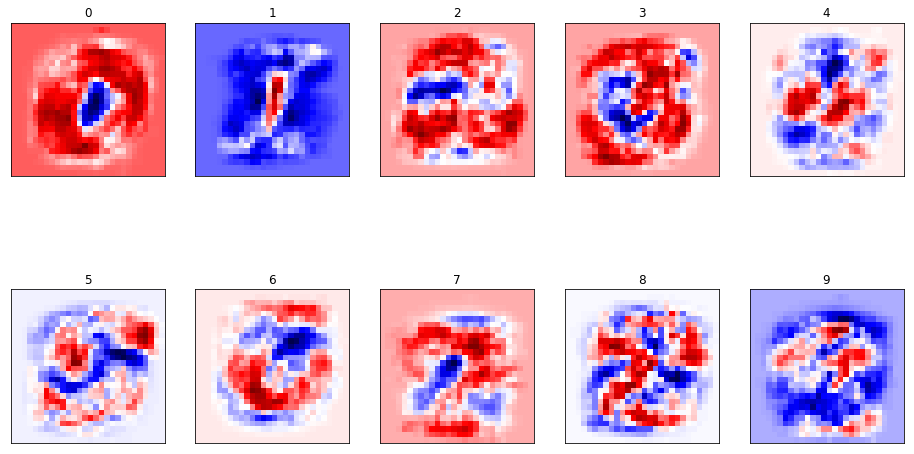

In [28]:
for i in range(10):
    plt.pyplot.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.pyplot.title(i)
    plt.pyplot.imshow(weight.reshape([28,28]), cmap=plt.pyplot.get_cmap('seismic'))
    frame1 = plt.pyplot.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
plt.pyplot.show()

Our final figure shows the weights for each digit 0 through 9. These are by far the most important factor in determining whether your model will succeed or fail. The majority of effort in machine learning is spent in the optimization of these weights, which are what provide us with the model we can use to make predictions on future data. 

>Keep in mind that this sort of visualization becomes less meaningful/interpretable as the size and complexity of the model (particularly, the number of layers) grows beyond the relatively simple model that we've implemented in this example.

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


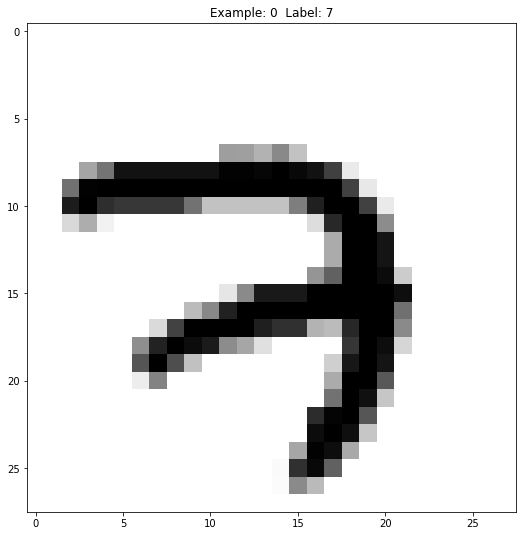

In [29]:
x_train, y_train = train_size(1)
display_digit(0)

In [30]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[2.1248014e-05 1.1646926e-05 8.9631744e-02 1.9201512e-02 8.2086457e-04
  1.2516833e-05 3.8538197e-05 8.5374612e-01 6.9188890e-03 2.9596956e-02]]


In [31]:
answer.argmax()

7

Play with `display_compare()` below and try to do the following:
- Find some examples where the model guesses incorrectly. Do they make sense?
- See what happens when you only use a small number (<10) of training samples. How do the weights change?

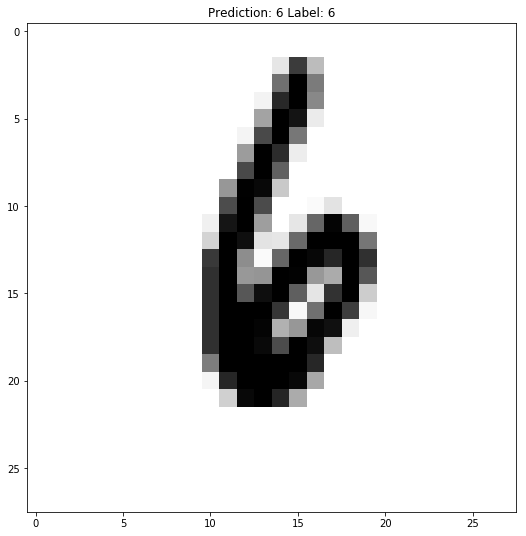

In [32]:
def display_compare(num):
    # Load one training example
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # Get our label as an integer
    label = y_train.argmax()
    # Get our prediction as an integer
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.pyplot.title('Prediction: %d Label: %d' % (prediction, label))
    plt.pyplot.imshow(x_train.reshape([28,28]), cmap=plt.pyplot.get_cmap('gray_r'))
    plt.pyplot.show()
     
display_compare(ran.randint(0, 55000))    

<a id="topic-review"></a>
## Lesson Review
---

- We explored the decision-making capacity of single artificial neurons, and the role of weights in adjusting the outcome of our decision.
- We saw how the structure of these networks make it possible to represent relatively complex relationships in the data.
- We were shown how to use Tensor flow to create convolutional neural network models that can be structured (i.e. shaped) to handle a wide-variety of prediction tasks.
- We covered how to load the MNIST dataset in TensorFlow and generate plots of the dataset.
- We saw how to reshape the MNIST dataset and develop a pretty simple (but well-performing) multi-layer perceptron model to tackle the problem.

**Any further questions?**